## Trabalho Prático 1

Bootcamp Analista de Machine Learning @ IGTI

Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
bikes = pd.read_csv('/content/drive/MyDrive/Data Science/Bootcamp Analista de ML/Módulo 1 - Introdução ao Aprendizado de Maquina/Desafio/comp_bikes_mod.csv')

In [6]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [7]:
bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
#No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [9]:
15641 + 1738

17379

In [10]:
#Contando valores nulos
bikes['temp'].isnull().sum()

#Fazendo % de valores nulos
percentual = bikes['temp'].isnull().sum()/len(bikes)
percentual

0.10000575407100523

In [11]:
bikes['dteday'].dropna(inplace=True)

In [12]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [13]:
bikes['temp'].describe()

count    15641.000000
mean         0.497062
std          0.192451
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [14]:
bikes['season'].unique()

array([ 1., nan,  2.,  3.,  4.])

In [15]:
pd.to_datetime(bikes['dteday'])

0              NaT
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376          NaT
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [16]:
bikes['dteday'].head(-1)

0               NaN
1        2011-01-01
2        2011-01-01
3        2011-01-01
4        2011-01-01
            ...    
17373    2012-12-31
17374    2012-12-31
17375    2012-12-31
17376           NaN
17377    2012-12-31
Name: dteday, Length: 17378, dtype: object

In [17]:
import seaborn as sns

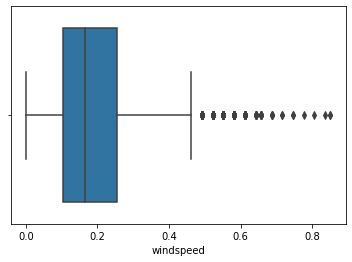

In [18]:
#sns.boxplot(bikes['windspeed'], bikes['dteday'])
windspeed = sns.boxplot(x=bikes['windspeed'])
#df_compart_bikes.boxplot(['windspeed']) #boxplot para a velocidade do vento (['windspeed'])

In [19]:
bikescorr = bikes[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
bikescorr

,season,temp,atemp,hum,windspeed,cnt
0,1.0,NaN,0.2879,0.81,0.0000,16.0
1,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...,...
17374,NaN,0.26,0.2576,0.60,0.1642,119.0
17375,1.0,0.26,0.2576,0.60,0.1642,89.0
17376,1.0,0.26,0.2576,0.60,0.1642,90.0
17377,1.0,0.26,0.2727,0.56,0.1343,61.0


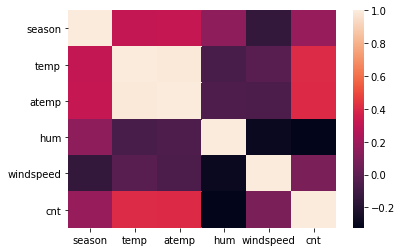

In [20]:
sns.heatmap(bikescorr.corr())

In [37]:
#Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. 
#Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente.
#Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

bikes.fillna(bikes.mean(), inplace=True)

#utiliza as funções do sklearn para construir a regressão linear
from sklearn.linear_model import LinearRegression
 

In [38]:
bikes[["hum","cnt", "casual"]].isnull().sum()

hum       0
cnt       0
casual    0
dtype: int64

In [39]:
xbikes = np.array(bikes[['hum', 'casual']])
ybikes = np.array(bikes[['cnt']])


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [41]:
regressao = LinearRegression()

In [42]:
regressao.fit(xbikes, ybikes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

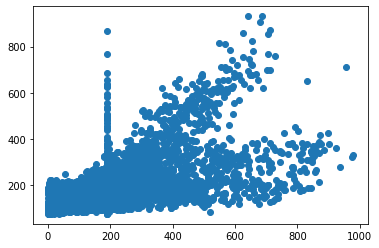

In [45]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(xbikes, ybikes, test_size = 0.3, random_state = 0)

ln = LinearRegression()

ln.fit(x_treinamento, y_treinamento)

predict1 = ln.predict(x_teste)
plt.scatter(y_teste, predict1)



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


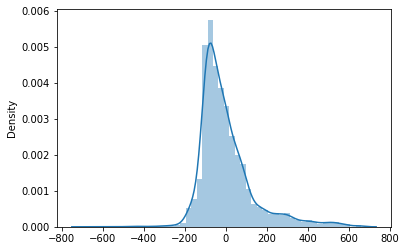

In [46]:
sns.distplot(y_teste-predict1)


In [47]:
teste1score = ln.score(x_teste, y_teste)
teste1score

0.39968373708574867

In [50]:
#adotando decision tree regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

dtr = DecisionTreeRegressor(random_state=0)
cross_val_score(dtr, xbikes, ybikes, cv=10)

array([-1.21503101, -0.07757739, -0.11925807,  0.11274396, -0.19087971,
       -0.0678078 ,  0.24585495,  0.20704259,  0.23371018,  0.23002566])

In [59]:
dtr.fit(xbikes, ybikes, sample_weight=50)
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(xbikes, ybikes, test_size = 0.3, random_state = 0)

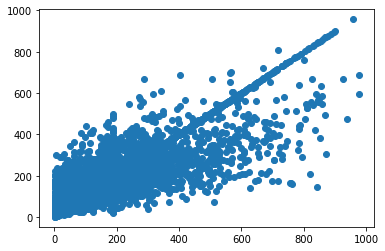

In [60]:
predict2 = dtr.predict(x_teste)
plt.scatter(y_teste, predict2)

In [61]:
teste2score = dtr.score(x_teste, y_teste)
teste2score

0.6914369266443903